In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [4]:
df=pd.read_csv("API.csv")
df.head()

,year,oil_price,oil_production,fdi_pct,gdp_const,exg_rate
0,1973,9.08,2.054,2.459956,1.780000e+13,0.657895
1,1974,13.16,2.255,1.034345,1.980000e+13,0.630282
2,1975,12.70,1.783,1.692362,1.880000e+13,0.615502
3,1976,13.81,2.067,0.933656,2.050000e+13,0.626601
4,1977,15.29,2.085,1.222448,2.170000e+13,0.644701


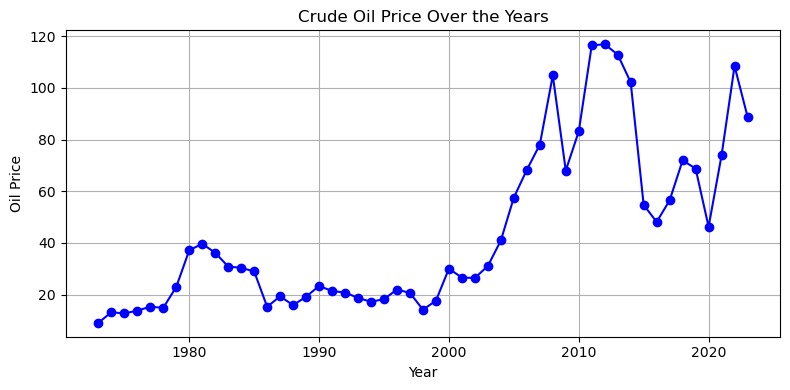

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(df['year'], df['oil_price'], marker='o', color='blue')
plt.title('Crude Oil Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Oil Price')
plt.grid(True)
plt.tight_layout()
plt.show()

- Oil prices fluctuated sharply over the years, showing how sensitive they are to global events and market changes, which can affect the economy.

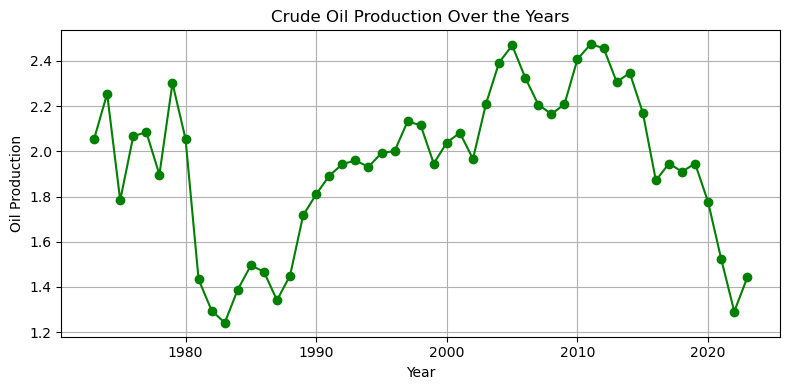

In [7]:
plt.figure(figsize=(8, 4))
plt.plot(df['year'], df['oil_production'], marker='o', color='green')
plt.title('Crude Oil Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Oil Production')
plt.grid(True)
plt.tight_layout()
plt.show()


In the early 1980s, production was relatively high but dropped sharply.

From the mid-1980s to early 2000s, production steadily increased.

Between 2005 and 2015, production peaked.

After 2015, there's a noticeable decline, with a sharp drop around 2020, possibly due to the COVID-19 pandemic.

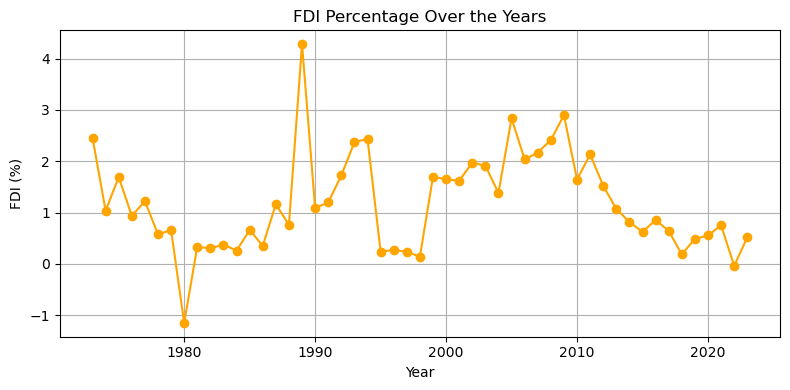

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(df['year'], df['fdi_pct'], marker='o', color='orange')
plt.title('FDI Percentage Over the Years')
plt.xlabel('Year')
plt.ylabel('FDI (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


- The FDI percentage fluctuates, sometimes sharply, year-to-year.
- No clear persistent upward or downward trend
- FDI is influenced by both domestic policy and global investor sentiment, leading to its volatility. Sudden jumps or drops may reflect changes in policy or economic stability

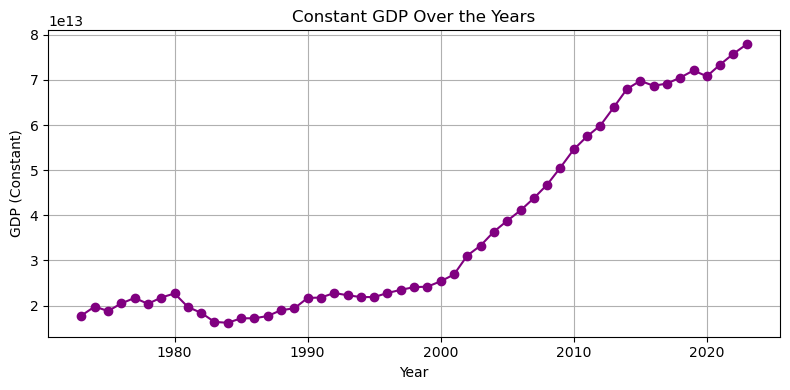

In [11]:
plt.figure(figsize=(8, 4))
plt.plot(df['year'], df['gdp_const'], marker='o', color='purple')
plt.title('Constant GDP Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP (Constant)')
plt.grid(True)
plt.tight_layout()
plt.show()


- GDP shows a long-term upward trend, indicating economic growth.
- Growth may not be strictly linear; some periods show faster or slower increases.

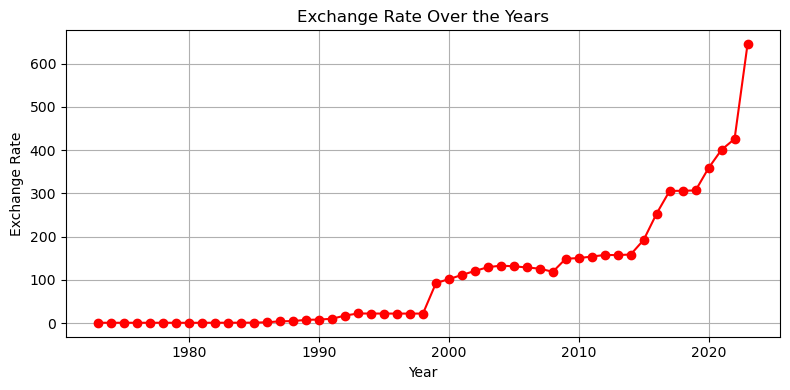

In [13]:
plt.figure(figsize=(8, 4))
plt.plot(df['year'], df['exg_rate'], marker='o', color='red')
plt.title('Exchange Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

- The exchange rate remains relatively stable at low values for a period, then rises sharply in later years.
- The sharp increase suggests significant currency devaluation or policy shift.

In [15]:
df_numeric = df.drop(columns=["year"])

# Display summary statistics
df_numeric.describe()

,oil_price,oil_production,fdi_pct,gdp_const,exg_rate
count,51.000000,51.000000,51.000000,5.100000e+01,51.000000
mean,44.105882,1.940824,1.175231,3.682353e+13,107.993960
std,32.247093,0.343061,0.956047,2.109331e+13,138.972526
min,9.080000,1.241000,-1.150856,1.620000e+13,0.546781
25%,18.960000,1.779000,0.500212,2.045000e+13,1.324149
50%,30.360000,1.966000,1.034345,2.410000e+13,22.065400
75%,68.135000,2.189000,1.710726,5.605000e+13,152.080000
max,116.880000,2.474000,4.282088,7.790000e+13,645.194068


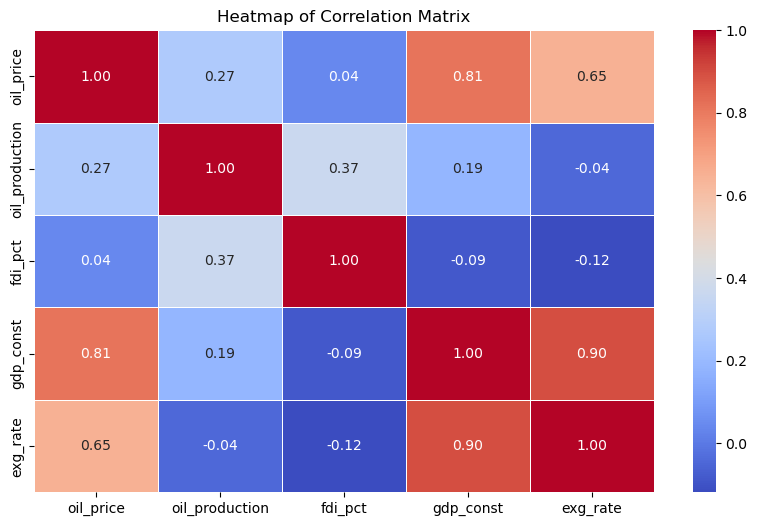

In [16]:
# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Heatmap of Correlation Matrix")
plt.show()

In [17]:
for column in df_numeric.columns:
    result = adfuller(df_numeric[column].dropna())
    
    print(f"ADF Test for {column}:")
    print(f"Test Statistic: {result[0]:.4f}")
    print(f"P-Value: {result[1]:.4f}")
    print(f"Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value:.4f}")
    
    if result[1] < 0.05:
        print("=> The series is likely stationary.")
    else:
        print("=> The series is likely non-stationary.")
    
    print("-" * 40)

ADF Test for oil_price:
Test Statistic: -1.4864
P-Value: 0.5403
Critical Values:
   1%: -3.5685
   5%: -2.9214
   10%: -2.5987
=> The series is likely non-stationary.
----------------------------------------
ADF Test for oil_production:
Test Statistic: -1.8933
P-Value: 0.3352
Critical Values:
   1%: -3.5715
   5%: -2.9226
   10%: -2.5993
=> The series is likely non-stationary.
----------------------------------------
ADF Test for fdi_pct:
Test Statistic: -4.3079
P-Value: 0.0004
Critical Values:
   1%: -3.5685
   5%: -2.9214
   10%: -2.5987
=> The series is likely stationary.
----------------------------------------
ADF Test for gdp_const:
Test Statistic: 1.3734
P-Value: 0.9970
Critical Values:
   1%: -3.5715
   5%: -2.9226
   10%: -2.5993
=> The series is likely non-stationary.
----------------------------------------
ADF Test for exg_rate:
Test Statistic: 4.7143
P-Value: 1.0000
Critical Values:
   1%: -3.5685
   5%: -2.9214
   10%: -2.5987
=> The series is likely non-stationary.
-----

- The Augmented Dickey-Fuller (ADF) test is performed on each variable to check for stationarity (important for time series analysis).
- oil_price, oil_production, gdp_const, exg_rate: Found to be non-stationary (p-value > 0.05).
- fdi_pct: Found to be stationary (p-value < 0.05).


In [19]:
# Apply log10 transformation individually
df["log_oil_price"] = np.log10(df["oil_price"])
df["log_oil_production"] = np.log10(df["oil_production"])
df["log_gdp_const"] = np.log10(df["gdp_const"])
df["log_exg_rate"] = np.log10(df["exg_rate"])

# Display the transformed columns
print(df[["log_oil_price", "log_oil_production", "log_gdp_const", "log_exg_rate"]].head())

   log_oil_price  log_oil_production  log_gdp_const  log_exg_rate
0       0.958086            0.312600      13.250420     -0.181843
1       1.119256            0.353147      13.296665     -0.200465
2       1.103804            0.251151      13.274158     -0.210771
3       1.140194            0.315340      13.311754     -0.203009
4       1.184407            0.319106      13.336460     -0.190642


- Logarithmic transformation (base 10) is applied to key variables to stabilize variance and normalize distributions. Logarithm function was applied to non-stationary features such as "oil_price", "oil_production", "gdp_const", "exg_rate".

In [21]:
combined_df = df[["log_oil_price", "log_oil_production", "log_gdp_const", "log_exg_rate"]].copy()

# Add the fdi_pct column to this DataFrame
combined_df['fdi_pct'] = df['fdi_pct']

# Display the combined DataFrame
print(combined_df.head())

   log_oil_price  log_oil_production  log_gdp_const  log_exg_rate   fdi_pct
0       0.958086            0.312600      13.250420     -0.181843  2.459956
1       1.119256            0.353147      13.296665     -0.200465  1.034345
2       1.103804            0.251151      13.274158     -0.210771  1.692362
3       1.140194            0.315340      13.311754     -0.203009  0.933656
4       1.184407            0.319106      13.336460     -0.190642  1.222448


In [22]:
# Define the base features
X = combined_df[['log_oil_price', 'log_oil_production', 'fdi_pct', 'log_exg_rate']]

# Generate lag features (lag 1 and lag 2)
lags = 1
X_lagged = pd.concat([X.shift(i).add_suffix(f'_lag{i}') for i in range(1, lags + 1)], axis=1)

# Combine with original features
X_all = pd.concat([X, X_lagged], axis=1)

# Combine with target
df_lag = pd.concat([combined_df[['log_gdp_const']], X_all], axis=1)

# Drop rows with NaN due to lagging
df_lag = df_lag.dropna().reset_index(drop=True)

# Final check
print(df_lag.head())


   log_gdp_const  log_oil_price  log_oil_production   fdi_pct  log_exg_rate  \
0      13.296665       1.119256            0.353147  1.034345     -0.200465   
1      13.274158       1.103804            0.251151  1.692362     -0.210771   
2      13.311754       1.140194            0.315340  0.933656     -0.203009   
3      13.336460       1.184407            0.319106  1.222448     -0.190642   
4      13.309630       1.172603            0.278067  0.577459     -0.197040   

   log_oil_price_lag1  log_oil_production_lag1  fdi_pct_lag1  \
0            0.958086                 0.312600      2.459956   
1            1.119256                 0.353147      1.034345   
2            1.103804                 0.251151      1.692362   
3            1.140194                 0.315340      0.933656   
4            1.184407                 0.319106      1.222448   

   log_exg_rate_lag1  
0          -0.181843  
1          -0.200465  
2          -0.210771  
3          -0.203009  
4          -0.190642  


- lagged values give more information about the history and trends, which often leads to better predictive accuracy.

In [24]:
df_lag.head()

,log_gdp_const,log_oil_price,log_oil_production,fdi_pct,log_exg_rate,log_oil_price_lag1,log_oil_production_lag1,fdi_pct_lag1,log_exg_rate_lag1
0,13.296665,1.119256,0.353147,1.034345,-0.200465,0.958086,0.312600,2.459956,-0.181843
1,13.274158,1.103804,0.251151,1.692362,-0.210771,1.119256,0.353147,1.034345,-0.200465
2,13.311754,1.140194,0.315340,0.933656,-0.203009,1.103804,0.251151,1.692362,-0.210771
3,13.336460,1.184407,0.319106,1.222448,-0.190642,1.140194,0.315340,0.933656,-0.203009
4,13.309630,1.172603,0.278067,0.577459,-0.197040,1.184407,0.319106,1.222448,-0.190642


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
y = df_lag['log_gdp_const']
X = df_lag.iloc[:,1:]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=False
)

- The data is split into training and testing sets. For time series, shuffling is avoided to preserve temporal order.

In [27]:
# Manual split for time series (no shuffling)
train_size = 39  # first 39 observations for training

ml_X_train = X.iloc[:train_size]
ml_y_train = y.iloc[:train_size]

ml_X_test = X.iloc[train_size:]
ml_y_test = y.iloc[train_size:]

In [28]:
ml_X_train.shape

(39, 8)

In [29]:
ml_X_test.shape

(11, 8)

In [30]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(ml_X_train,ml_y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


print(importance_df)

                   Feature  Importance
7        log_exg_rate_lag1    0.439106
3             log_exg_rate    0.351151
0            log_oil_price    0.068376
1       log_oil_production    0.058096
4       log_oil_price_lag1    0.052723
5  log_oil_production_lag1    0.017156
6             fdi_pct_lag1    0.006994
2                  fdi_pct    0.006399


In [31]:
selected_features = importance_df[importance_df['Importance'] > 0.02]['Feature'].tolist()
# Select features from DataFrame
new_X = df_lag[selected_features]

# Define target
y = df_lag['log_gdp_const']

# Split into training and testing sets
newX_train, newX_test, y_train, y_test = train_test_split(
    new_X, y, test_size=0.1,shuffle=False
)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize Linear Regression model
lr_model = LinearRegression()

# Fit the model on training data
lr_model.fit(newX_train, y_train)

# Predict on training and testing data
train_pred = lr_model.predict(newX_train)
test_pred = lr_model.predict(newX_test)

lr_mse_test = mean_squared_error(y_test, test_pred)

print(f"Test Mean Squared Error: {lr_mse_test:.6f}")
lr_rmse_test = np.sqrt(lr_mse_test)

# Print results
print(f"Test Root Mean Squared Error (RMSE): {lr_rmse_test:.6f}")


Test Mean Squared Error: 0.050233
Test Root Mean Squared Error (RMSE): 0.224126


In [33]:

# Initialize Random Forest Regressor
rf__model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit model on training data
rf__model.fit(newX_train, y_train)

# Predict on both training and test data
rf_train_pred = rf__model.predict(newX_train)
rf_test_pred = rf__model.predict(newX_test)

rf_mse_test = mean_squared_error(y_test, rf_test_pred)

# Print results

print(f"Test Mean Squared Error (MSE): {rf_mse_test:.6f}")
rf_rmse_test = np.sqrt(rf_mse_test)

# Print results
print(f"Test Root Mean Squared Error (RMSE): {rf_rmse_test:.6f}")

Test Mean Squared Error (MSE): 0.001378
Test Root Mean Squared Error (RMSE): 0.037126


In [34]:
from xgboost import XGBRegressor

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Fit model on training data
xgb_model.fit(newX_train, y_train)

# Predict on both training and test data
xgb_train_pred = xgb_model.predict(newX_train)
xgb_test_pred = xgb_model.predict(newX_test)

# Compute MSE
xgb_mse_test = mean_squared_error(y_test, xgb_test_pred)

# Print results
print(f"XGBoost Test Mean Squared Error (MSE): {xgb_mse_test:.6f}")
xgb_rmse_test = np.sqrt(xgb_mse_test)

# Print results
print(f"Test Root Mean Squared Error (RMSE): {xgb_rmse_test:.6f}")

XGBoost Test Mean Squared Error (MSE): 0.000803
Test Root Mean Squared Error (RMSE): 0.028346


In [35]:
# Manual split for time series (no shuffling) for statistical model
train_size = 39  # first 39 observations for training

stat_X_train = X.iloc[:train_size]
stat_y_train = y.iloc[:train_size]

stat_X_test = X.iloc[train_size:]
stat_y_test = y.iloc[train_size:]

In [36]:
stat_X_train.shape

(39, 8)

In [37]:
stat_X_test.shape

(11, 8)

In [38]:
from statsmodels.tsa.ardl import ARDL, ardl_select_order
sel = ardl_select_order(stat_y_train, 2, stat_X_train, 2, ic="aic")
ardl=sel.model
ardl.ardl_order

(1, 0, 0, 0)

In [39]:
result = ardl.fit()

print(result.summary())

                              ARDL Model Results                              
Dep. Variable:          log_gdp_const   No. Observations:                   39
Model:               ARDL(1, 0, 0, 0)   Log Likelihood                 101.451
Method:               Conditional MLE   S.D. of innovations              0.017
Date:                Mon, 16 Jun 2025   AIC                           -190.902
Time:                        18:03:01   BIC                           -181.077
Sample:                             1   HQIC                          -187.406
                                   39                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0686      0.400      0.171      0.865      -0.746       0.883
log_gdp_const.L1               0.9929      0.031     32.245      0.000       0.930 

In [40]:
stat_y_pred = result.predict(
    start=stat_y_test.index[0],
    end=stat_y_test.index[-1],
    exog_oos=stat_X_test
)

# Step 5: Compute MSE
ardl_mse_test = mean_squared_error(stat_y_test.loc[stat_y_pred.index], stat_y_pred)
print(f"ARDL Test MSE: {ardl_mse_test:.4f}")
ardl_rmse_test = np.sqrt(ardl_mse_test)

# Print results
print(f"Test Root Mean Squared Error (RMSE): {ardl_rmse_test:.6f}")

ARDL Test MSE: 0.0037
Test Root Mean Squared Error (RMSE): 0.061073


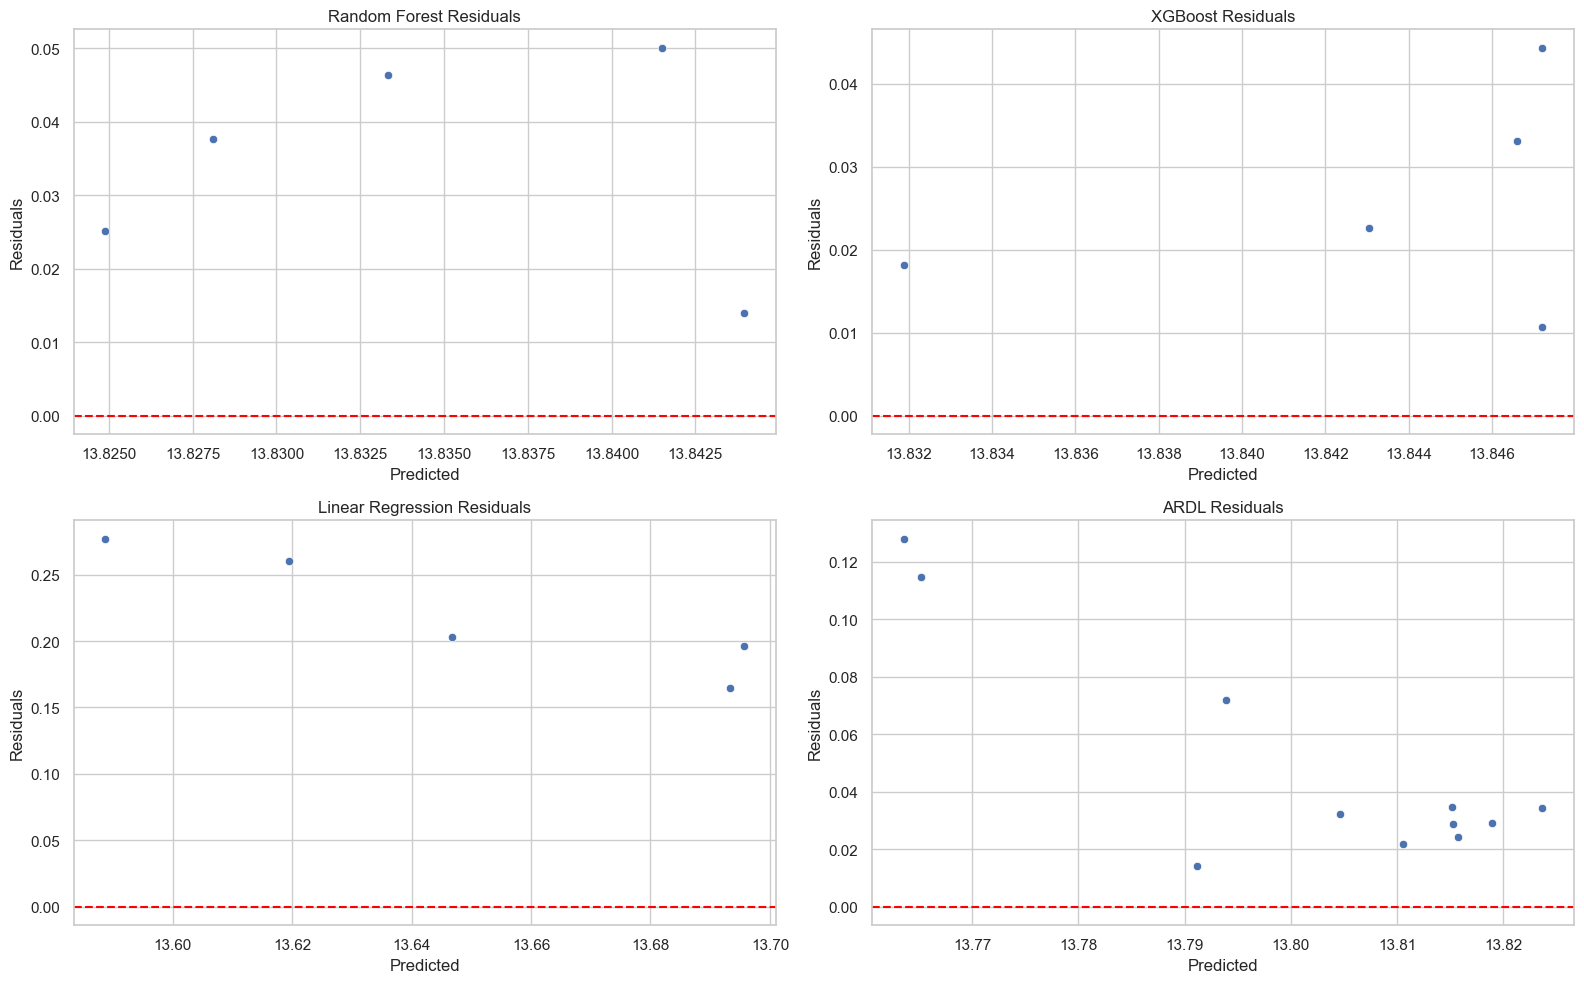

In [41]:
# Compute residuals
rf_residuals = y_test - rf_test_pred
xgb_residuals = y_test - xgb_test_pred
lr_residuals = y_test - test_pred
ardl_residuals = stat_y_test.loc[stat_y_pred.index] - stat_y_pred

# Set up plot style
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(16, 10))

# Random Forest residuals
plt.subplot(2, 2, 1)
sns.scatterplot(x=rf_test_pred, y=rf_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Random Forest Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

# XGBoost residuals
plt.subplot(2, 2, 2)
sns.scatterplot(x=xgb_test_pred, y=xgb_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('XGBoost Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

# Linear Regression residuals
plt.subplot(2, 2, 3)
sns.scatterplot(x=test_pred, y=lr_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Linear Regression Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

# ARDL residuals
plt.subplot(2, 2, 4)
sns.scatterplot(x=stat_y_pred, y=ardl_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('ARDL Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


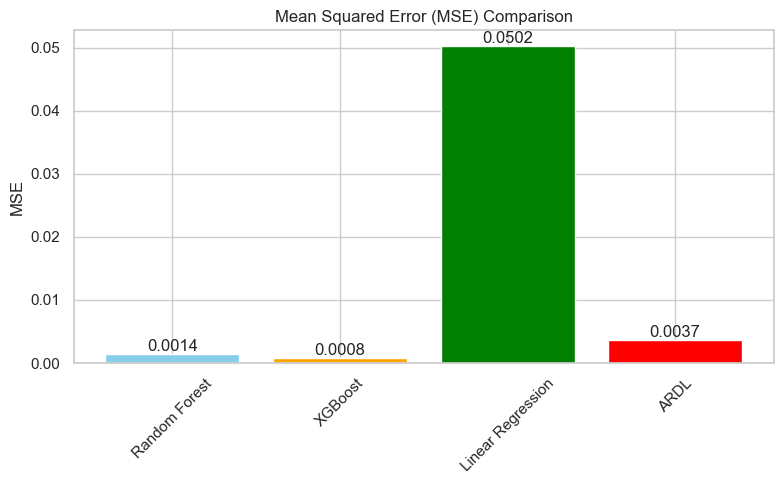

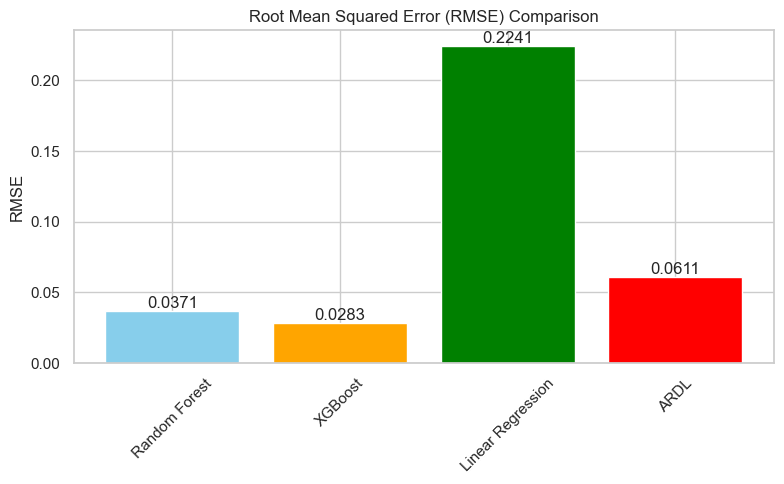

In [42]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'XGBoost', 'Linear Regression', 'ARDL']
mse_values = [rf_mse_test, xgb_mse_test, lr_mse_test, ardl_mse_test]
rmse_values = [rf_rmse_test, xgb_rmse_test, lr_rmse_test, ardl_rmse_test]
colors = ['skyblue', 'orange', 'green', 'red']

# --- MSE Plot ---
plt.figure(figsize=(8, 5))
bars = plt.bar(models, mse_values, color=colors)
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) Comparison')
plt.xticks(rotation=45)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height,
             f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# --- RMSE Plot ---
plt.figure(figsize=(8, 5))
bars = plt.bar(models, rmse_values, color=colors)
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.xticks(rotation=45)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height,
             f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
